## K-Nearest Neighbors (KNN) Example - Iris Flower Classification

**Goal:** Predict the species of an Iris flower based on its sepal and petal measurements using the KNN algorithm.

**KNN Intuition:** KNN is a simple, supervised machine learning algorithm used for both classification and regression. The core idea is: "Tell me who your neighbors are, and I'll tell you who you are."

For classification, KNN looks at the 'K' closest data points (neighbors) in the training set to a new, unseen data point. It then assigns the new data point to the class that is most common among those 'K' neighbors.

---

### 1. Import Libraries

First, we need to import the necessary Python libraries.

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For loading the dataset and splitting data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# For the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# For evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for plots
sns.set(style="ticks")

print("Libraries imported successfully!")

Libraries imported successfully!


---

### 2. Load and Explore the Dataset

We'll use the Iris dataset, which is built into scikit-learn. It contains measurements for 150 Iris flowers from 3 different species: Setosa, Versicolor, and Virginica. The features are Sepal Length, Sepal Width, Petal Length, and Petal Width (all in cm).

In [2]:
# Load the dataset
iris = load_iris()

# Create a Pandas DataFrame for easier exploration
# iris.data contains the features, iris.feature_names are the column names
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
# iris.target contains the numeric labels (0, 1, 2)
# iris.target_names maps these numbers to species names
iris_df['species_id'] = iris.target
iris_df['species_name'] = iris_df['species_id'].map(dict(enumerate(iris.target_names)))

# Display the first few rows
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

# Display basic information about the dataset
print("\nDataset Info:")
iris_df.info()

# Display summary statistics
print("\nSummary Statistics:")
print(iris_df.describe())

# Display the counts of each species
print("\nSpecies Counts:")
print(iris_df['species_name'].value_counts())

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_id species_name  
0           0       setosa  
1           0       setosa  
2           0       setosa  
3           0       setosa  
4           0       setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   p

---

### 3. Visualize the Data (Optional but Recommended)

Visualizing helps understand the relationships between features and how distinct the classes are. A pairplot is great for this.


Generating Pairplot...


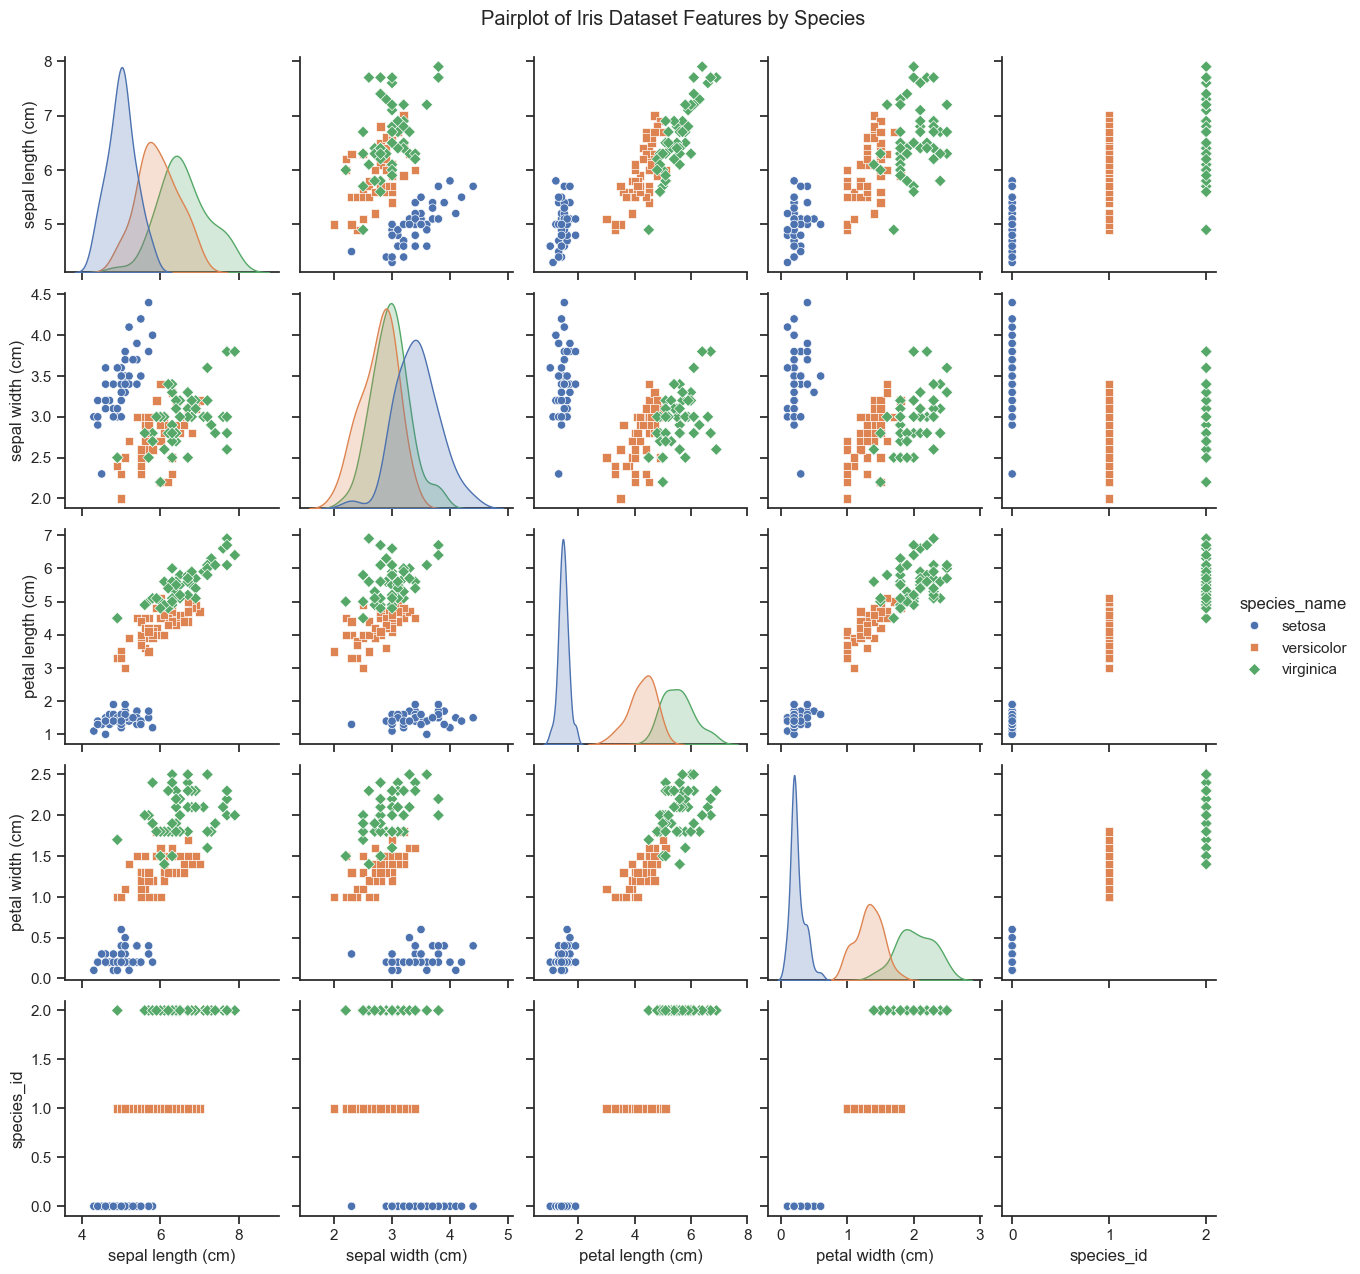

Pairplot displayed.


In [3]:
# Create a pairplot to visualize relationships between features, colored by species
print("\nGenerating Pairplot...")
sns.pairplot(iris_df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset Features by Species", y=1.02) # Adjust title position
plt.show()
print("Pairplot displayed.")

*Observation:* From the pairplot, we can see that the Setosa species (blue) is generally well-separated from Versicolor (orange) and Virginica (green), especially based on petal measurements. Versicolor and Virginica show some overlap. This suggests KNN should perform reasonably well.

---

### 4. Prepare Data for Modeling

We need to:
1.  Separate the features (X) and the target variable (y).
2.  Split the data into a training set (to train the model) and a testing set (to evaluate its performance on unseen data).

In [4]:
# Features (measurements)
X = iris.data # Or iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Target variable (species labels as numbers 0, 1, 2)
y = iris.target # Or iris_df['species_id']

# Split data into training and testing sets (e.g., 80% train, 20% test)
# random_state ensures reproducibility - the split will be the same each time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of species is the same in train and test sets

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape:  X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(120, 4), y_train=(120,)
Testing set shape:  X_test=(30, 4), y_test=(30,)


---

### 5. Build and Train the KNN Model

Now, we create an instance of the `KNeighborsClassifier` and train it using our training data. We need to choose a value for 'K' (the number of neighbors). A common starting point is K=3 or K=5. Let's start with K=5.

In [5]:
# Choose the number of neighbors (K)
k = 5

# Create the KNN classifier instance
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training data
# KNN 'training' is mostly just storing the data
knn_model.fit(X_train, y_train)

print(f"KNN model trained with K={k}.")

KNN model trained with K=5.


---

### 6. Make Predictions

Use the trained model to predict the species for the flowers in the *test* set.

In [6]:
# Predict the species for the test data
y_pred = knn_model.predict(X_test)

# Display the first few predictions vs actual values
print("\nSample Predictions vs Actual Labels:")
sample_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)
# Map numeric labels back to names for clarity
sample_comparison['Actual_Name'] = sample_comparison['Actual'].map(dict(enumerate(iris.target_names)))
sample_comparison['Predicted_Name'] = sample_comparison['Predicted'].map(dict(enumerate(iris.target_names)))
print(sample_comparison[['Actual_Name', 'Predicted_Name']])


Sample Predictions vs Actual Labels:
  Actual_Name Predicted_Name
0      setosa         setosa
1   virginica      virginica
2  versicolor     versicolor
3  versicolor     versicolor
4      setosa         setosa
5  versicolor     versicolor
6      setosa         setosa
7      setosa         setosa
8   virginica      virginica
9  versicolor     versicolor


---

### 7. Evaluate the Model

How well did our model do? We use metrics like accuracy, confusion matrix, and classification report.


Model Accuracy (K=5): 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


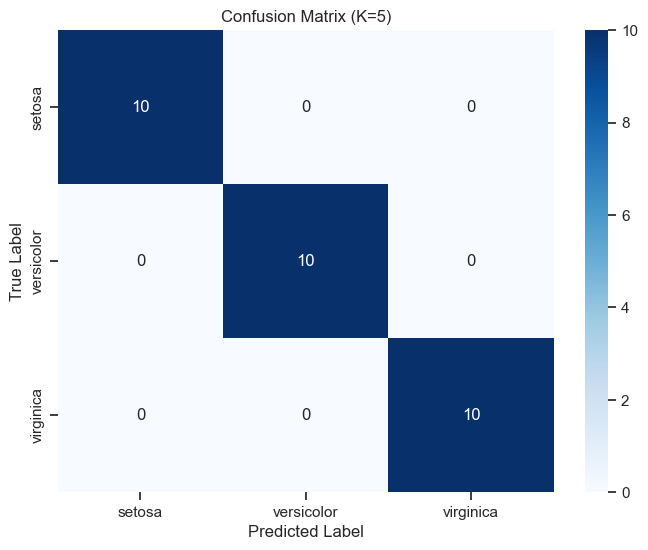


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy (K={k}): {accuracy:.4f}") # Format to 4 decimal places

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (K={k})')
plt.show()

# Generate the Classification Report
# This shows precision, recall, f1-score for each class
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

*Interpretation:*
* **Accuracy:** The overall percentage of correct predictions.
* **Confusion Matrix:** Shows how many instances of each actual class were predicted into each potential class. The diagonal elements represent correct predictions. Off-diagonal elements represent misclassifications.
* **Classification Report:**
    * *Precision:* Out of all predictions for a species, how many were correct? (TP / (TP + FP))
    * *Recall:* Out of all actual instances of a species, how many did the model correctly identify? (TP / (TP + FN))
    * *F1-Score:* The harmonic mean of precision and recall, providing a single score balancing both.
    * *Support:* The number of actual instances of the class in the test set.

---

### 8. Choosing the Right 'K' (Optional Hyperparameter Tuning)

The choice of 'K' can impact performance. We can try different values of K and see which one gives the best accuracy on the test set.

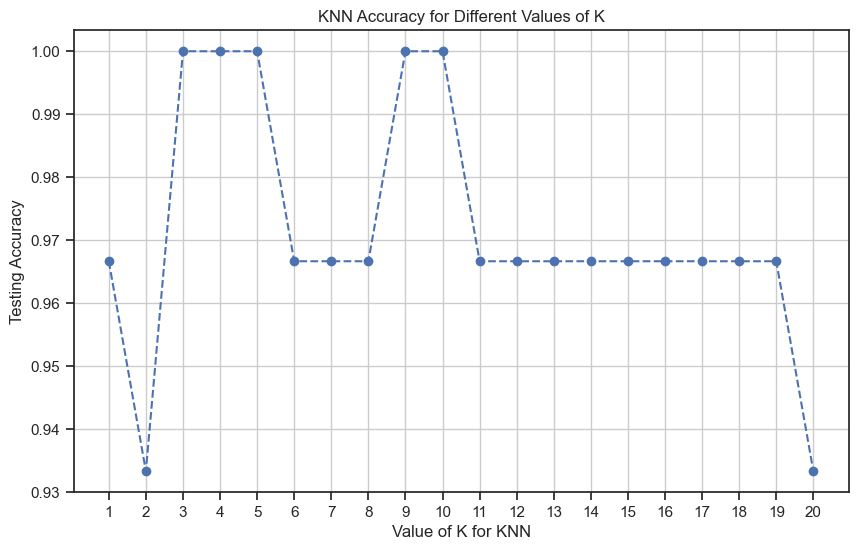


Best accuracy of 1.0000 achieved with K = 3


In [8]:
# Try K values from 1 to 20
k_range = range(1, 21)
accuracy_scores = []

for k_val in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k_val)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_temp))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='dashed')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('KNN Accuracy for Different Values of K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the K with the highest accuracy
best_k = k_range[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"\nBest accuracy of {best_accuracy:.4f} achieved with K = {best_k}")

*Observation:* The plot helps visualize how accuracy changes with K. Often, very small K values can be sensitive to noise, while very large K values might oversmooth the decision boundary. The plot helps find a good balance. Based on this plot (results may vary slightly due to the `random_state`), several K values give perfect or near-perfect accuracy on this test set.

---

### 9. Conclusion

We successfully built, trained, and evaluated a K-Nearest Neighbors classifier to predict Iris flower species based on their physical measurements. We saw that KNN performed very well on this dataset, achieving high accuracy. We also explored how to choose an optimal value for the hyperparameter 'K'.

KNN is a simple yet powerful algorithm, especially useful as a baseline model or when the decision boundary is irregular. However, be mindful that it can be computationally expensive for very large datasets (as it needs to compare a new point to all training points) and is sensitive to the scale of features (feature scaling is often recommended, though not strictly necessary for Iris).

---